<a href="https://colab.research.google.com/github/HimanshakChawla/Stock-Analysis/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd

# Updated stock list with L&T
tickers = {
    'ABB': 'ABB.NS',
    'Reliance': 'RELIANCE.NS',
    'Infosys': 'INFY.NS',
    'HDFC_Bank': 'HDFCBANK.NS',
    'Larsen_Toubro': 'LT.NS'
}

# Time range
start_date = '2014-01-01'
end_date = '2024-12-31'

# Download and save each stock to CSV
for name, ticker in tickers.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    data.to_csv(f'{name}_10yr_data.csv')
    print(f'{name} ✅ Downloaded with {len(data)} rows')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


ABB ✅ Downloaded with 2710 rows


[*********************100%***********************]  1 of 1 completed


Reliance ✅ Downloaded with 2710 rows


[*********************100%***********************]  1 of 1 completed


Infosys ✅ Downloaded with 2710 rows


[*********************100%***********************]  1 of 1 completed


HDFC_Bank ✅ Downloaded with 2710 rows


[*********************100%***********************]  1 of 1 completed

Larsen_Toubro ✅ Downloaded with 2710 rows


In [ ]:
from google.colab import files
files.download('Reliance_10yr_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('Reliance_10yr_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('Infosys_10yr_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('HDFC_Bank_10yr_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('Larsen_Toubro_10yr_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('ABB_10yr_data.csv')

# Check if 'Date' column exists, if not, assume it's 'Unnamed: 0' or the first column
if 'Date' not in df.columns:
    # Assuming the date is in the first column (index 0) and named "Unnamed: 0"
    first_column_name = df.columns[0]
    df.rename(columns={first_column_name: 'Date'}, inplace=True)
    # If the date column has a different name or index, adjust accordingly

# Parse dates, handling errors and sorting
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Handle errors gracefully
df = df.dropna(subset=['Date'])  # Drop rows with invalid dates
df = df.sort_values('Date')

# Save Date column for later
dates = df['Date'].values

# Use only Close price
close_prices = df[['Close']].values

# Normalize Close prices
scaler = MinMaxScaler()
normalized_close = scaler.fit_transform(close_prices)

# Create sequences
sequence_length = 60
X, y, sequence_dates = [], [], []

for i in range(sequence_length, len(normalized_close)):
    X.append(normalized_close[i-sequence_length:i])
    y.append(normalized_close[i])
    sequence_dates.append(dates[i])  # Keep corresponding date

X, y = np.array(X), np.array(y)
sequence_dates = np.array(sequence_dates)  # For later plotting

<ipython-input-10-49074595b4af>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Handle errors gracefully


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0026
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 7.3531e-05
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 6.3625e-05
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 6.5844e-05
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 6.9691e-05
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 5.6067e-05
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 6.1891e-05
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 5.4996e-05
Epoch 9/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 5.5022e-05
Epoch 10/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 5.0436e-05
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


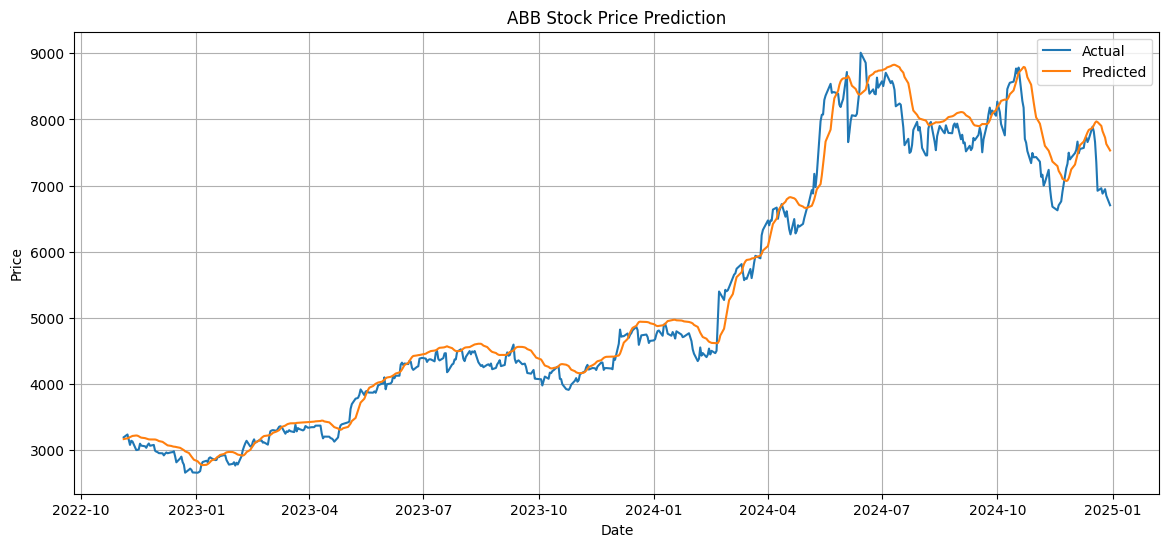

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ... (Your existing data loading and preprocessing code) ...

# Split data into training and testing sets
train_size = int(len(X) * 0.8)  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(units=31, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=31))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch_size

# ... (Your existing prediction and plotting code) ...

# After inverse-transforming predictions
import matplotlib.pyplot as plt

# Predict and inverse-transform
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Corresponding dates for test set
test_dates = sequence_dates[train_size:]

# Plot with dates
plt.figure(figsize=(14, 6))
plt.plot(test_dates, real_prices, label='Actual')
plt.plot(test_dates, predicted_prices, label='Predicted')
plt.title('ABB Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape X to 3D for LSTM: (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.0073 - val_loss: 0.0033
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 3.2295e-04 - val_loss: 0.0026
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 2.9995e-04 - val_loss: 0.0028
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 2.7409e-04 - val_loss: 0.0024
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 3.3824e-04 - val_loss: 0.0021
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 2.6106e-04 - val_loss: 0.0024
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 2.9651e-04 - val_loss: 0.0020
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 2.6647e-04 - val_loss: 0.0025
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 2.1287e-04 - val_loss: 0.0027
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 2.3271e-04 - val_loss: 0.0046
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 2.3739e-04 - val_loss: 0.0029
Epoch 12/20
75/75 ━━━━━━━━━━━━━━━

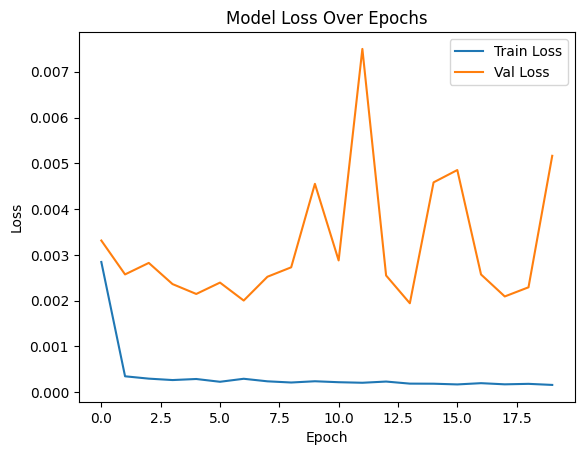

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 1.6737e-04
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.6521e-04
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 1.6454e-04
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 1.7988e-04
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 1.4192e-04
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 1.5835e-04
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.4694e-04
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 1.6486e-04
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 1.3911e-04
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 1.5405e-04
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


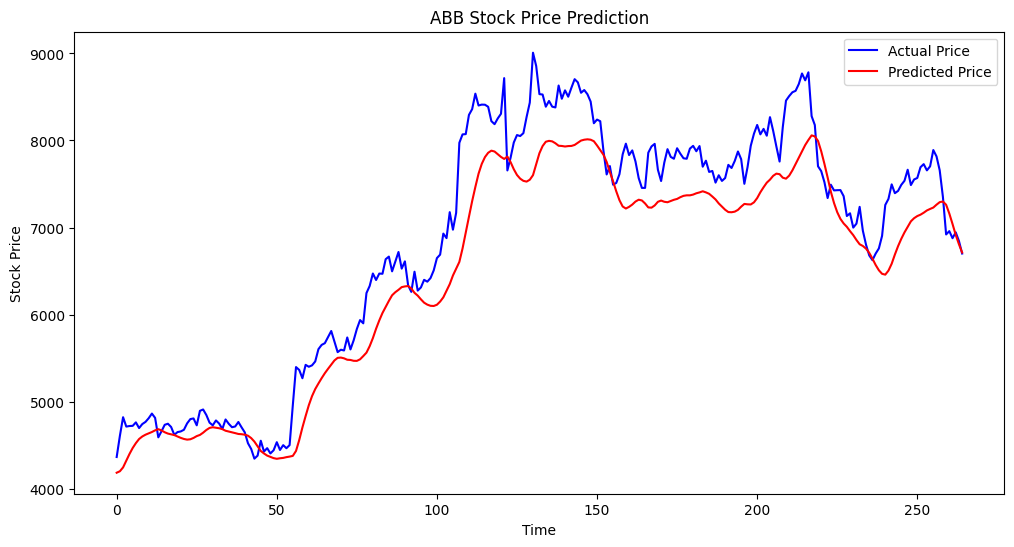

In [ ]:
# Redo the preprocessing split
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Re-train the model if needed
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict on test data
predicted = model.predict(X_test)

# Inverse scale
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predicted vs real
plt.figure(figsize=(12, 6))
plt.plot(real_prices, color='blue', label='Actual Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title('ABB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
initial_capital = 100000
capital = initial_capital
holding = 0  # number of shares
transaction_cost_rate = 0.001  # 0.1%

# Use real and predicted prices
signals = []
for i in range(1, len(predicted_prices)):
    prev_price = real_prices[i - 1][0]
    predicted_price = predicted_prices[i][0]

    change_pct = (predicted_price - prev_price) / prev_price

    # Buy condition
    if change_pct > 0.01 and holding == 0:
        holding = capital // prev_price
        capital -= holding * prev_price
        capital -= holding * prev_price * transaction_cost_rate
        signals.append('Buy')

    # Sell condition
    elif change_pct < -0.01 and holding > 0:
        capital += holding * prev_price
        capital -= holding * prev_price * transaction_cost_rate
        holding = 0
        signals.append('Sell')

    else:
        signals.append('Hold')

# Final sell if holding at end
if holding > 0:
    capital += holding * real_prices[-1][0]
    capital -= holding * real_prices[-1][0] * transaction_cost_rate
    holding = 0

roi = ((capital - initial_capital) / initial_capital) * 100
print(f"Final Capital: ₹{capital:,.2f}")
print(f"Return on Investment: {roi:.2f}%")


Final Capital: ₹102,155.08
Return on Investment: 2.16%


In [ ]:
pip install plotly

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Re-load ABB data for candlestick plotting
df = pd.read_csv("ABB_10yr_data.csv")

# Assuming the date is in the first column (index 0) if 'Date' is not found
if 'Date' not in df.columns:
    first_column_name = df.columns[0]  # Get the name of the first column
    df.rename(columns={first_column_name: 'Date'}, inplace=True)  # Rename it to 'Date'

# Now you can safely convert to datetime:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Handle potential errors during conversion
df = df.dropna(subset=['Date'])  # Drop rows with invalid dates if any

df = df[['Date', 'Open', 'High', 'Low', 'Close']].sort_values('Date').reset_index(drop=True)

# Align signals to correct length
plot_data = df.iloc[-len(signals):].copy()
plot_data['Signal'] = signals

# Create the base candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=plot_data['Date'],
    open=plot_data['Open'],
    high=plot_data['High'],
    low=plot_data['Low'],
    close=plot_data['Close'],
    name='Candlestick'
)])

# Add Buy/Sell markers
buy_signals = plot_data[plot_data['Signal'] == 'Buy']
sell_signals = plot_data[plot_data['Signal'] == 'Sell']

# Buy markers
fig.add_trace(go.Scatter(
    x=buy_signals['Date'],
    y=buy_signals['Low'],
    mode='markers',
    marker=dict(symbol='arrow-up', color='green', size=12),
    name='Buy'
))

# Sell markers
fig.add_trace(go.Scatter(
    x=sell_signals['Date'],
    y=sell_signals['High'],
    mode='markers',
    marker=dict(symbol='arrow-down', color='red', size=12),
    name='Sell'
))

# Layout settings
fig.update_layout(
    title='ABB Stock - Buy/Sell Strategy (LSTM)',
    xaxis_title='Date',
    yaxis_title='Price (INR)',
    xaxis_rangeslider_visible=False,
    template='plotly_dark',
    height=600
)

fig.show()

<ipython-input-28-7c7155d8b2c7>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Handle potential errors during conversion


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"📊 Evaluation Metrics:")
print(f"➡️ MAE  (Mean Absolute Error): {mae:.4f}")
print(f"➡️ RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"➡️ R² Score: {r2:.4f}")

📊 Evaluation Metrics:
➡️ MAE  (Mean Absolute Error): 399.6548
➡️ RMSE (Root Mean Squared Error): 488.8843
➡️ R² Score: 0.8757
